---
# Exercício Titanic - kNN, Regressão Logística
---
**Machine Learning em Projetos (Erick Muzart e Fernando melo)**   
Tópicos:
- One-hot Encoder get-dummies
- Knn
- Regressão logística
- Matriz de confusão

<br>
------------------------------------------------
   
Fonte dados:  Titanic, descritos em: https://www.openml.org/d/40945

## Carregar bibliotecas

In [1]:
# Importar bibliotecas pandas, plot_confusion_matrix, train_test_split, matplotlib
import pandas as pd
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from sklearn import metrics
import seaborn as sns

## Análise exploratória dos dados

In [2]:
# Ler dados do Titanic a partir do site Openml.org
df = pd.read_csv('https://www.openml.org/data/get_csv/16826755/phpMYEkMl', na_values='?')

In [3]:
#dimensões do dataset
print(df.shape)
df.head(3)

(1309, 14)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
# Mostra número de valores nulos no dataset
df.isna().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [5]:
# Fazer um corte no dataset com as colunas:'age', 'pclass', 'sex', 'embarked', 'survived' e eliminar dados nulos.
titanic = df.loc[df.embarked.notna() & df.age.notna(), ['age', 'pclass', 'sex', 'embarked', 'survived']]

In [6]:
# Mostrar novas dimensões do dataset
print(titanic.shape)
titanic.head()

(1044, 5)


,age,pclass,sex,embarked,survived
0,29.0000,1,female,S,1
1,0.9167,1,male,S,1
2,2.0000,1,female,S,0
3,30.0000,1,male,S,0
4,25.0000,1,female,S,0


In [7]:
# Verifica balanceamento das classses (value_counts())
titanic.survived.value_counts()

0    619
1    425
Name: survived, dtype: int64

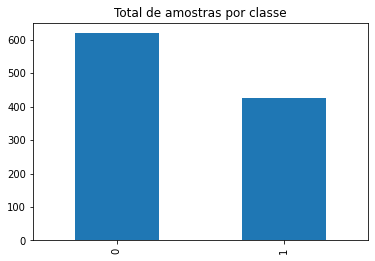

In [9]:
# Verifica balanceamento das classses (value_counts())
titanic.survived.value_counts().plot(kind='bar', title='Total de amostras por classe');

## Pré-processamento

In [ ]:
# Atribuir valores para X e y
X = titanic.iloc[:,:-1]
y = titanic.survived
# Mostrar as dimensões de X e y
print('Dimensões de X = ', X.shape)
print('Dimensões de y = ', y.shape)

Dimensões de X =  (1044, 4)
Dimensões de y =  (1044,)


### Encoding variáveis (features) categoricas :
Se as variáveis não possuem uma ordem específica, geralmente a melhor opção é one hot-encoding (dummy encoding)

In [ ]:
# Cria X com as features codificadas com ".get_dummies" do Pandas.
X_dummies = pd.get_dummies(X)
# Mostra o resultado da codificação one-hot encoding
X_dummies

,age,pclass,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,29.0000,1,1,0,0,0,1
1,0.9167,1,0,1,0,0,1
2,2.0000,1,1,0,0,0,1
3,30.0000,1,0,1,0,0,1
4,25.0000,1,1,0,0,0,1
...,...,...,...,...,...,...,...
1301,45.5000,3,0,1,1,0,0
1304,14.5000,3,1,0,1,0,0
1306,26.5000,3,0,1,1,0,0
1307,27.0000,3,0,1,1,0,0


In [ ]:
# Dividir dados em treino e teste (70/30)
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.3, random_state=42)

## Treinamento dos modelos

### Knn - K vizinhos mais próximos (K Nearest neighbors)

In [ ]:
# Importar o modelo knn
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Instanciar modelo de regressão logística
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
# Treinar o modelo, lembrando de aplicar o encoder nos dados de treinamento
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# Verificar a acurácia do modelo (.score)
knn.score(X_test, y_test)

0.7420382165605095

In [ ]:
# Verificar o f1_score do modelo, quando as classes estão desbalenceadas
metrics.f1_score(y_test, knn.predict(X_test), average='weighted')

0.7388330710864187

### Regressão Logística

In [ ]:
# Instanciar modelo de regressão logística
reg_log = LogisticRegression(max_iter=1000)

In [ ]:
# Treinar o modelo, lembrando de aplicar o encoder nos dados de treinamento
reg_log.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Verificar a acurácia do modelo (.score)
reg_log.score(X_test, y_test)

0.7834394904458599

In [ ]:
# Verificar o f1_score do modelo, quando as classes estão desbalenceadas
metrics.f1_score(y_test, reg_log.predict(X_test), average='weighted')

0.7823120115467104

## Avaliação da qualidade do melhor modelo

In [ ]:
# Importar a biblioteca (plot_confusion_matrix)
from sklearn.metrics import plot_confusion_matrix

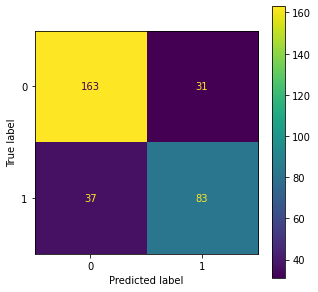

In [ ]:
# Mostrar a Matriz de Confusão para os diversos patamares de renda familiar
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(reg_log, X_test, y_test, ax=ax, values_format='d');

## Próximos passos
- Fazer normalização dos dados (Standard Scalar)   
- Treinar outros modelos:   
  - Árvore de decisão (Decision Tree Classifier)   
  - Floresta aleatória (Random Forest Classifier)

In [ ]:
# Árvore de decisão
clf = DecisionTreeClassifier(max_depth=4).fit(X_train, y_train)
clf.score(X_test, y_test)

0.8121019108280255

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_class = RandomForestClassifier(n_estimators=120, max_depth=6, random_state=100).fit(X_train, y_train)
rf_class.score(X_test, y_test)

0.802547770700637